In [4]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.7 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/home/sam/Desktop/large_routes_features.csv')

# Data Preprocessing
# Convert categorical features into numeric labels (e.g., street lighting, CCTV presence)
label_encoder = LabelEncoder()
df['StreetLighting'] = label_encoder.fit_transform(df['StreetLighting'])
df['PedestrianTraffic'] = label_encoder.fit_transform(df['PedestrianTraffic'])
df['CCTVPresence'] = label_encoder.fit_transform(df['CCTVPresence'])
df['SidewalkCondition'] = label_encoder.fit_transform(df['SidewalkCondition'])

# Define features (X) and target variable (y)
X = df[['Latitude', 'Longitude', 'CrimeFrequency', 'CrimeSeverity', 'StreetLighting', 
        'PedestrianTraffic', 'CCTVPresence', 'PoliceProximity', 'PublicTransportProximity', 'SidewalkCondition']]

# Creating a new target variable 'SafetyLevel' (Categorizing Safety Level based on custom rules)
# You can customize these thresholds based on real data
df['SafetyLevel'] = pd.cut(df['CrimeSeverity'], bins=[0, 3, 6, 10], labels=['Safe', 'Medium', 'Dangerous'])

y = df['SafetyLevel']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

   Dangerous       1.00      1.00      1.00        79
      Medium       1.00      1.00      1.00        56
        Safe       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Encode target labels (SafetyLevel)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Optionally, you can one-hot encode the labels (not needed for sparse_categorical_crossentropy)
# y_train_encoded = to_categorical(y_train_encoded, num_classes=3)
# y_test_encoded = to_categorical(y_test_encoded, num_classes=3)

# Build a Neural Network Model (Feedforward)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes: Safe, Medium, Dangerous)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


/home/sam/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3824 - loss: 75.4095 - val_accuracy: 0.3625 - val_loss: 14.1919
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3210 - loss: 14.2816 - val_accuracy: 0.3187 - val_loss: 6.0924
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3492 - loss: 4.6387 - val_accuracy: 0.3562 - val_loss: 3.0449
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3387 - loss: 3.0807 - val_accuracy: 0.3688 - val_loss: 2.6180
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3056 - loss: 2.9976 - val_accuracy: 0.4062 - val_loss: 1.8870
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4209 - loss: 2.4489 - val_accuracy: 0.4500 - val_loss: 2.7836
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3513 - loss: 2.7669 - val_accuracy: 0.4125 - val_loss: 1.9871
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4257 - loss: 2.2647 - val_accuracy: 0.5188 - val_loss: 1.4822

In [12]:
from sklearn.preprocessing import LabelEncoder

# Ensure the LabelEncoder is fitted with all possible values during training
street_lighting_classes = ['Good', 'Fair', 'Poor']
pedestrian_traffic_classes = ['Low', 'Medium', 'High']
cctv_presence_classes = ['Yes', 'No']
sidewalk_condition_classes = ['Good', 'Fair', 'Poor']

# Fit the label encoder with all possible values
street_lighting_encoder = LabelEncoder()
street_lighting_encoder.fit(street_lighting_classes)

pedestrian_traffic_encoder = LabelEncoder()
pedestrian_traffic_encoder.fit(pedestrian_traffic_classes)

cctv_presence_encoder = LabelEncoder()
cctv_presence_encoder.fit(cctv_presence_classes)

sidewalk_condition_encoder = LabelEncoder()
sidewalk_condition_encoder.fit(sidewalk_condition_classes)

# Predict safety levels for new routes (make sure to use the same encoders)
new_routes = pd.DataFrame({
    'Latitude': [13.1067, 13.1100],
    'Longitude': [80.0970, 80.1200],
    'CrimeFrequency': [5, 7],
    'CrimeSeverity': [2, 6],
    'StreetLighting': street_lighting_encoder.transform(['Good', 'Fair']),
    'PedestrianTraffic': pedestrian_traffic_encoder.transform(['Medium', 'High']),
    'CCTVPresence': cctv_presence_encoder.transform(['Yes', 'No']),
    'PoliceProximity': [300, 1000],
    'PublicTransportProximity': [500, 1200],
    'SidewalkCondition': sidewalk_condition_encoder.transform(['Good', 'Poor'])
})

# Predict safety level for these new routes
new_routes_predictions = rf_model.predict(new_routes)
print("Predicted Safety Levels for New Routes: ", new_routes_predictions)


Predicted Safety Levels for New Routes:  ['Safe' 'Medium']


In [15]:
# Add a marker to visualize the predicted safety levels
import folium
for i, row in new_routes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Predicted Safety Level: {new_routes_predictions[i]}",
        icon=folium.Icon(color='green' if new_routes_predictions[i] == 'Safe' else 'red')
    ).add_to(mymap)

# Show the map
# mymap


NameError: name 'mymap' is not defined

In [16]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the average location
crime_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['CrimeSeverity']] for index, row in df.iterrows()]

# Add heatmap
HeatMap(heat_data).add_to(crime_map)
crime_map


In [18]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.0 MB/s eta 0:00:003.7 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


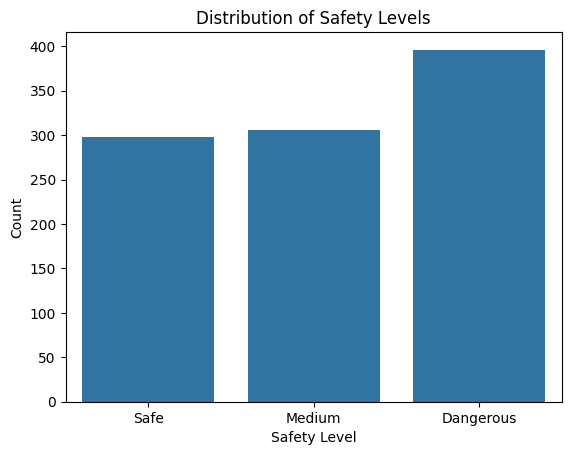

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='SafetyLevel', data=df)
plt.title('Distribution of Safety Levels')
plt.xlabel('Safety Level')
plt.ylabel('Count')
plt.show()


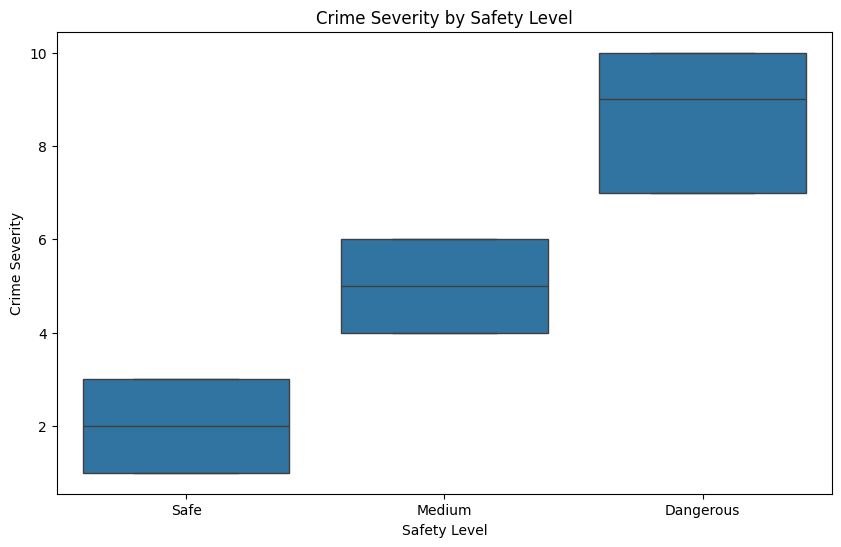

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SafetyLevel', y='CrimeSeverity', data=df)
plt.title('Crime Severity by Safety Level')
plt.xlabel('Safety Level')
plt.ylabel('Crime Severity')
plt.show()


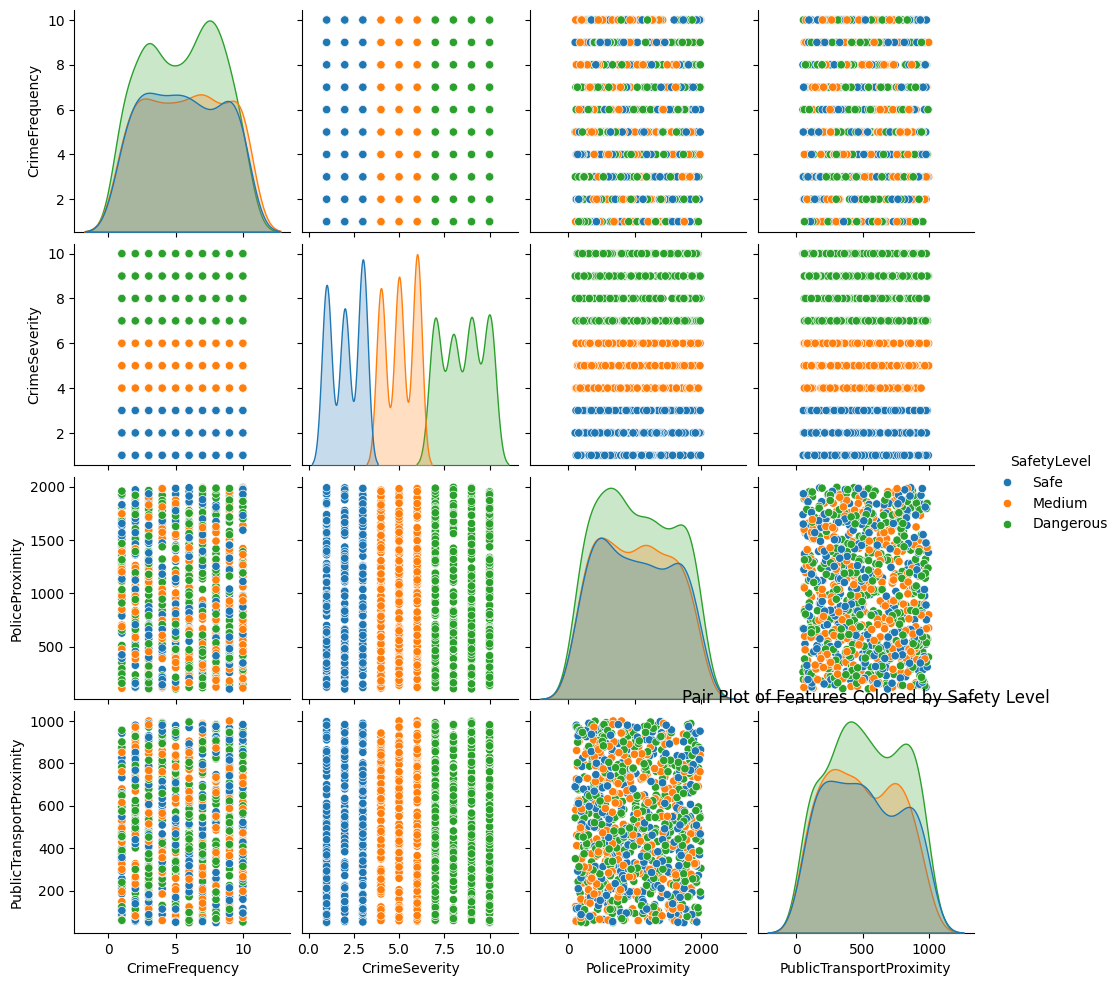

In [21]:
sns.pairplot(df, hue='SafetyLevel', vars=['CrimeFrequency', 'CrimeSeverity', 'PoliceProximity', 'PublicTransportProximity'])
plt.title('Pair Plot of Features Colored by Safety Level')
plt.show()


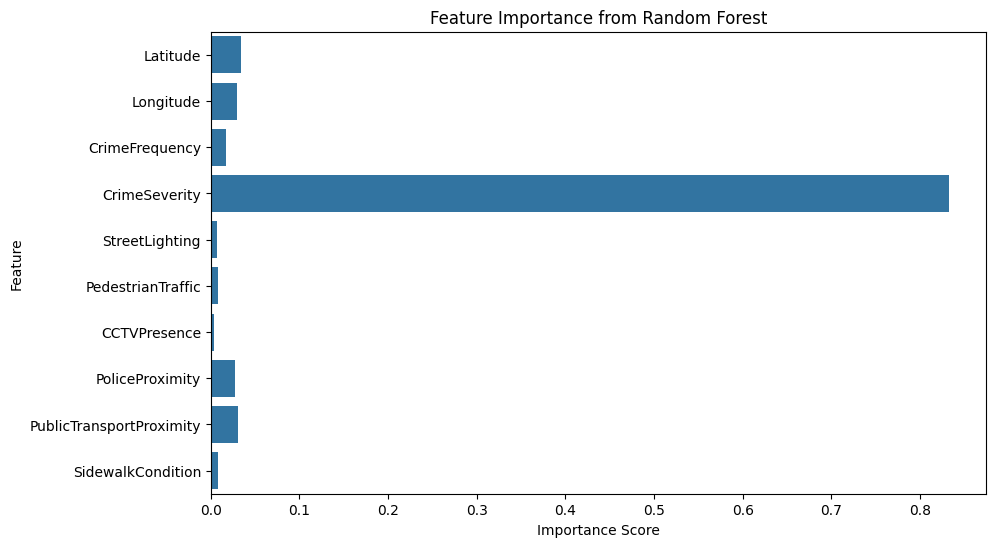

In [22]:
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
